In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import torch

sys.path.append('/home/ovoinov/work/3ddl/sk3ddl/src')
from sk3ddl.data.depth_utils.reprojections import depth_to_absolute_coordinates
from sk3ddl.data.depth_utils.normals import coords_to_normals

ModuleNotFoundError: No module named 'sk3ddl'

{'cx': 255.5, 'cy': 255.5, 'f': 618.0386007680322}
(512, 512)


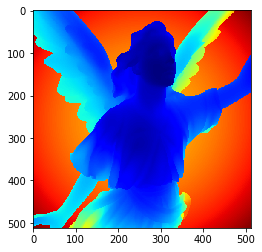

In [2]:
d = np.load('/home/ovoinov/work/3ddl/super-resolution/pdsr/data/lucy_depth.npy')

calib = np.load('/home/ovoinov/work/3ddl/super-resolution/pdsr/data/lucy_calibration.npy', allow_pickle=True).item()
del calib['baseline']

print(calib)
print(d.shape)
plt.imshow(d, cmap='jet')

torch.Size([3, 512, 512])


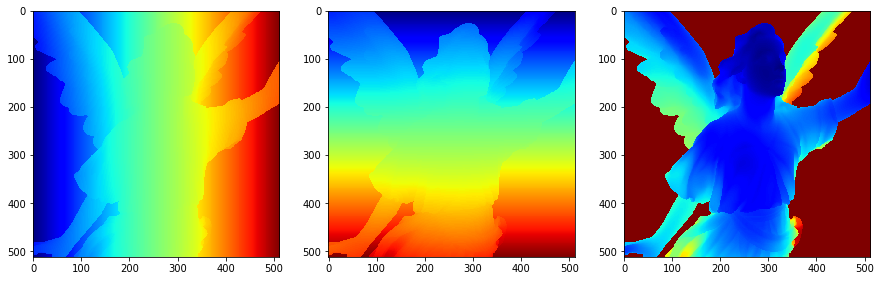

In [3]:
xyz = depth_to_absolute_coordinates(d, depth_type='perspective', calibration=calib)
print(xyz.shape)

fig, [axx, axy, axz] = plt.subplots(1, 3, figsize=(15, 5))
axx.imshow(xyz[0], cmap='jet')
axy.imshow(xyz[1], cmap='jet')
axz.imshow(xyz[2], cmap='jet')

In [4]:
normals = coords_to_normals(xyz)[0]  # get rid of automatically created batch dim
print(normals.shape)
print(f'Normal x is in [{normals[0].min()}, {normals[0].max()}]')  # x is to the right
print(f'Normal y is in [{normals[1].min()}, {normals[1].max()}]')  # y is to the top
print(f'Normal z is in [{normals[2].min()}, {normals[2].max()}]')  # z is to the camera

torch.Size([3, 512, 512])
Normal x is in [-0.9998995661735535, 0.9978908896446228]
Normal y is in [-0.9999646544456482, 0.9999970197677612]
Normal z is in [-1.0, 0.37919580936431885]


In [5]:
def colorize_normals(normals, flip_y=False):
    normals = normals.clone()
    normals[2] *= -1
    normals[2].clamp_(0, 1)
    
    if flip_y:
        normals[1] *= -1
    
    normals = torch.clamp((normals + 1) / 2 * 255, 0, 255).type(torch.uint8)
    return normals

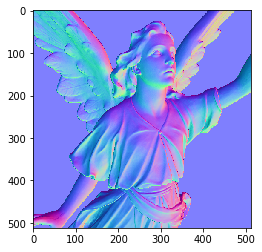

In [6]:
normals_cmapped = colorize_normals(normals)
normals_cmapped = normals_cmapped.permute(1, 2, 0)  # put channels to the end
plt.imshow(normals_cmapped)

### To make it like in the wikipedia page we also need to Y axis
![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Normal_map_example_with_scene_and_result.png/1920px-Normal_map_example_with_scene_and_result.png)

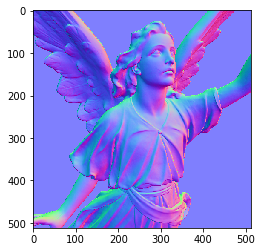

In [7]:
normals_cmapped = colorize_normals(normals, flip_y=True)
normals_cmapped = normals_cmapped.permute(1, 2, 0)
plt.imshow(normals_cmapped)